In [33]:
%reload_ext autoreload
%autoreload 2

In [34]:
import matplotlib.pyplot as plt

import numpy as np

from mcopt.pipeline import Pipeline
import mcopt.pipeline.util as util
from mcopt import MorseGraph, ot

In [35]:
pipeline = Pipeline('../pipeline.config.json')

tangaroa = pipeline.graph('tangaroa')

> Loading tangaroa complex
  config unchanged, reading complex


> Loading tangaroa graph


In [36]:
src = tangaroa.frames[0]
dests = tangaroa.frames[::10]

In [37]:
cmap = 'cool'
num_random_iter = 10
m = 0.95
rng = np.random.default_rng(42)

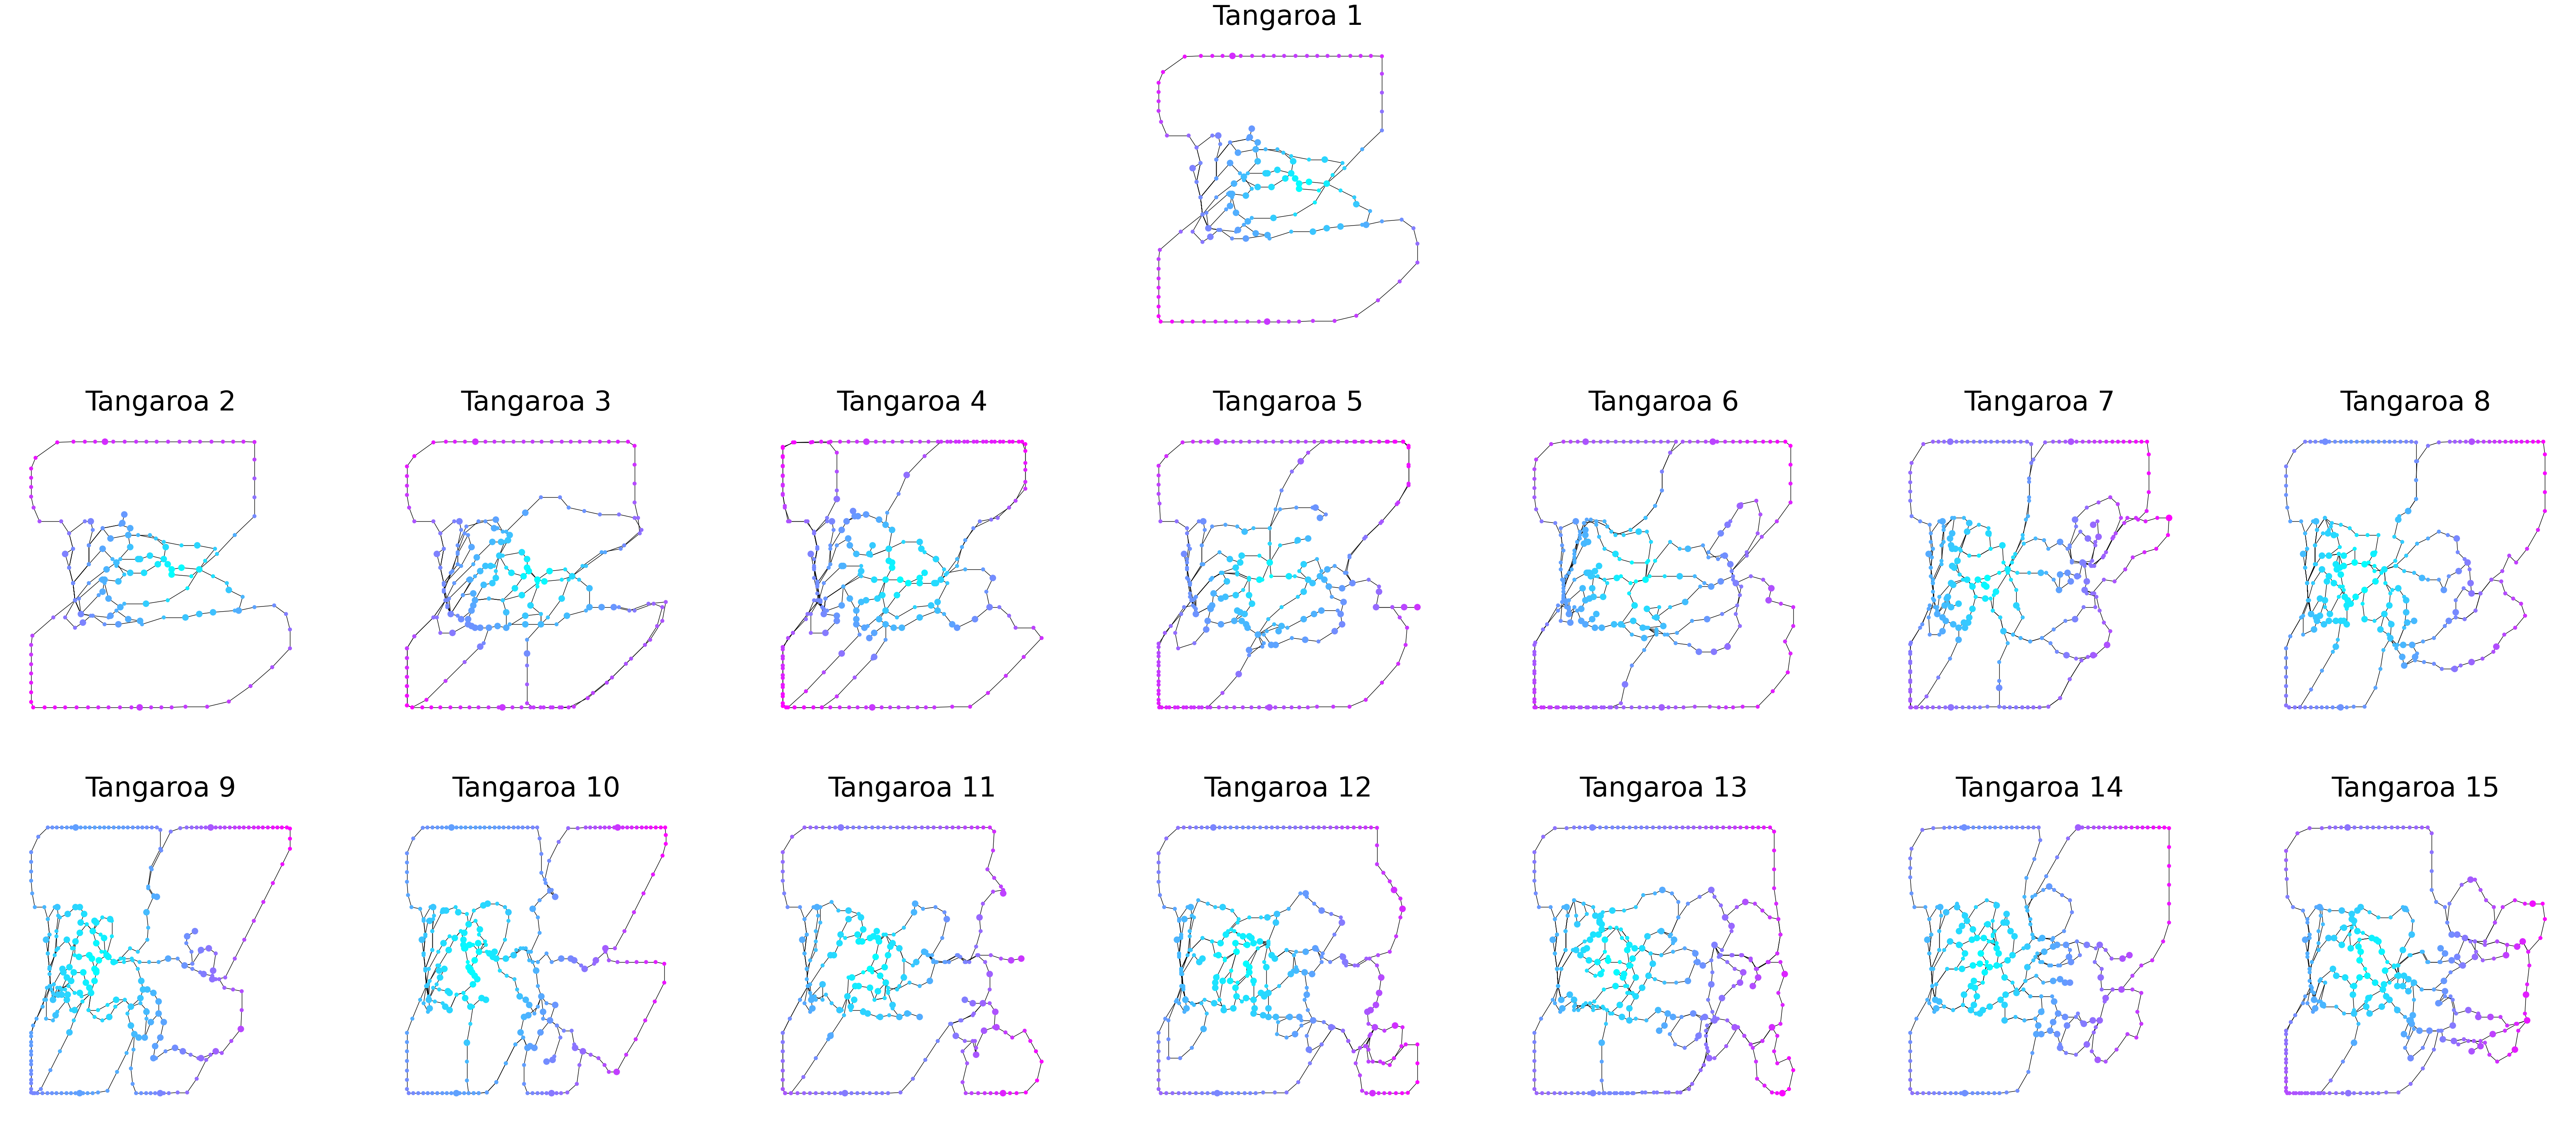

In [38]:
w, h = 7, 3

fig, axes = plt.subplots(h, w, figsize=(12 * w, 12 * h))

for ax in axes.ravel():
  ax.set_axis_off()

src.draw(ax=axes[0, w//2], cmap=cmap)
axes[0, w//2].set_title('Tangaroa 1', fontsize=50)

for i, (dest, ax) in enumerate(zip(dests, axes.ravel()[w:])):
  dest.draw(ax=ax, cmap=cmap)
  ax.set_title(f'Tangaroa {i + 2}', fontsize=50)

In [39]:
couplings = []

src_net = src.to_mpn(hist='degree', dist='geo')

for dest in dests:
  dest_net = dest.to_mpn(hist='degree', dist='geo')
    
  min_dist = float('inf')
  min_coupling = None
  
  for _ in range(num_random_iter):
    coupling, dist = ot.GW(src_net, dest_net, random_G0=True, random_state=rng)
    
    if dist < min_dist:
      min_dist = dist
      min_coupling = coupling
    
  couplings.append(coupling)

Text(0.5, 0.98, 'Tangaroa GW')

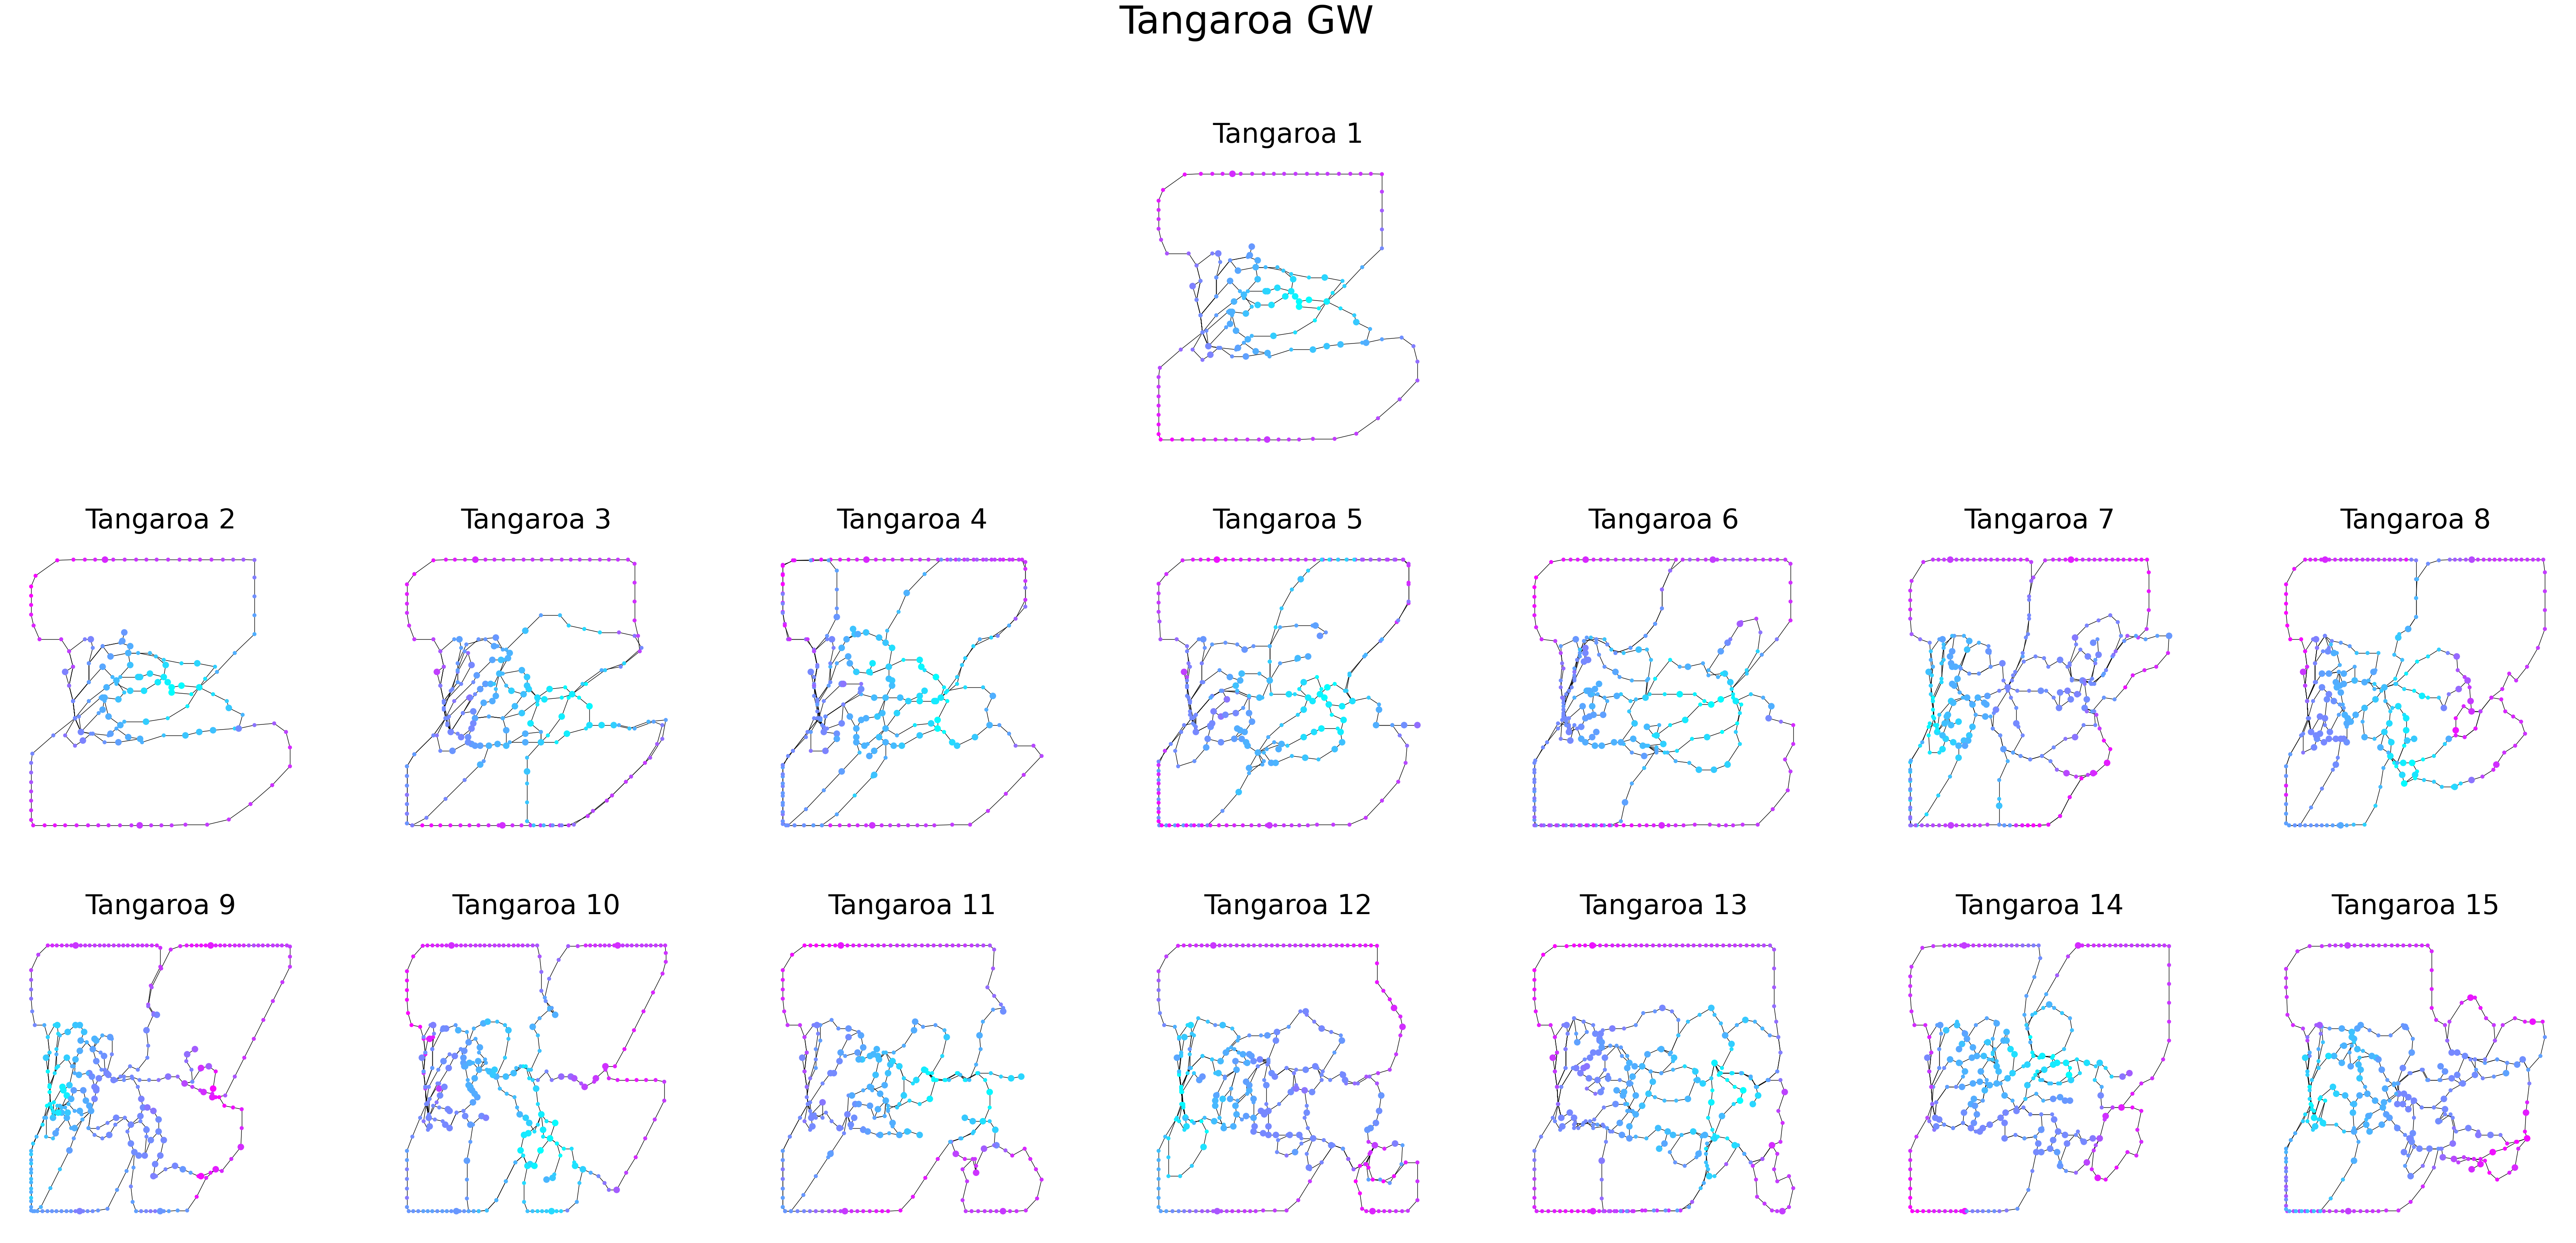

In [40]:
w, h = 7, 3

fig, axes = plt.subplots(h, w, figsize=(12 * w, 12 * h))

for ax in axes.ravel():
  ax.set_axis_off()

src_node_color = src.node_color_by_position()
src.draw(ax=axes[0, w//2], cmap=cmap, node_color=src_node_color)
axes[0, w//2].set_title('Tangaroa 1', fontsize=50)

for i, (dest, coupling, ax) in enumerate(zip(dests, couplings, axes.ravel()[w:])):
  dest.draw(ax=ax, cmap=cmap, node_color=dest.node_color_by_coupling(src_node_color, coupling))
  ax.set_title(f'Tangaroa {i + 2}', fontsize=50)
  
fig.suptitle('Tangaroa GW', fontsize=70)

In [41]:
couplings = []

src_net = src.to_mpn(hist='degree', dist='geo')

for dest in dests:
  dest_net = dest.to_mpn(hist='degree', dist='geo')
    
  M = MorseGraph.attribute_cost_matrix(src, dest)  

  
  coupling, _ = ot.fGW(src_net, dest_net, M, random_G0=True, random_state=rng)
    
  couplings.append(coupling)

Text(0.5, 0.98, 'Tangaroa fGW')

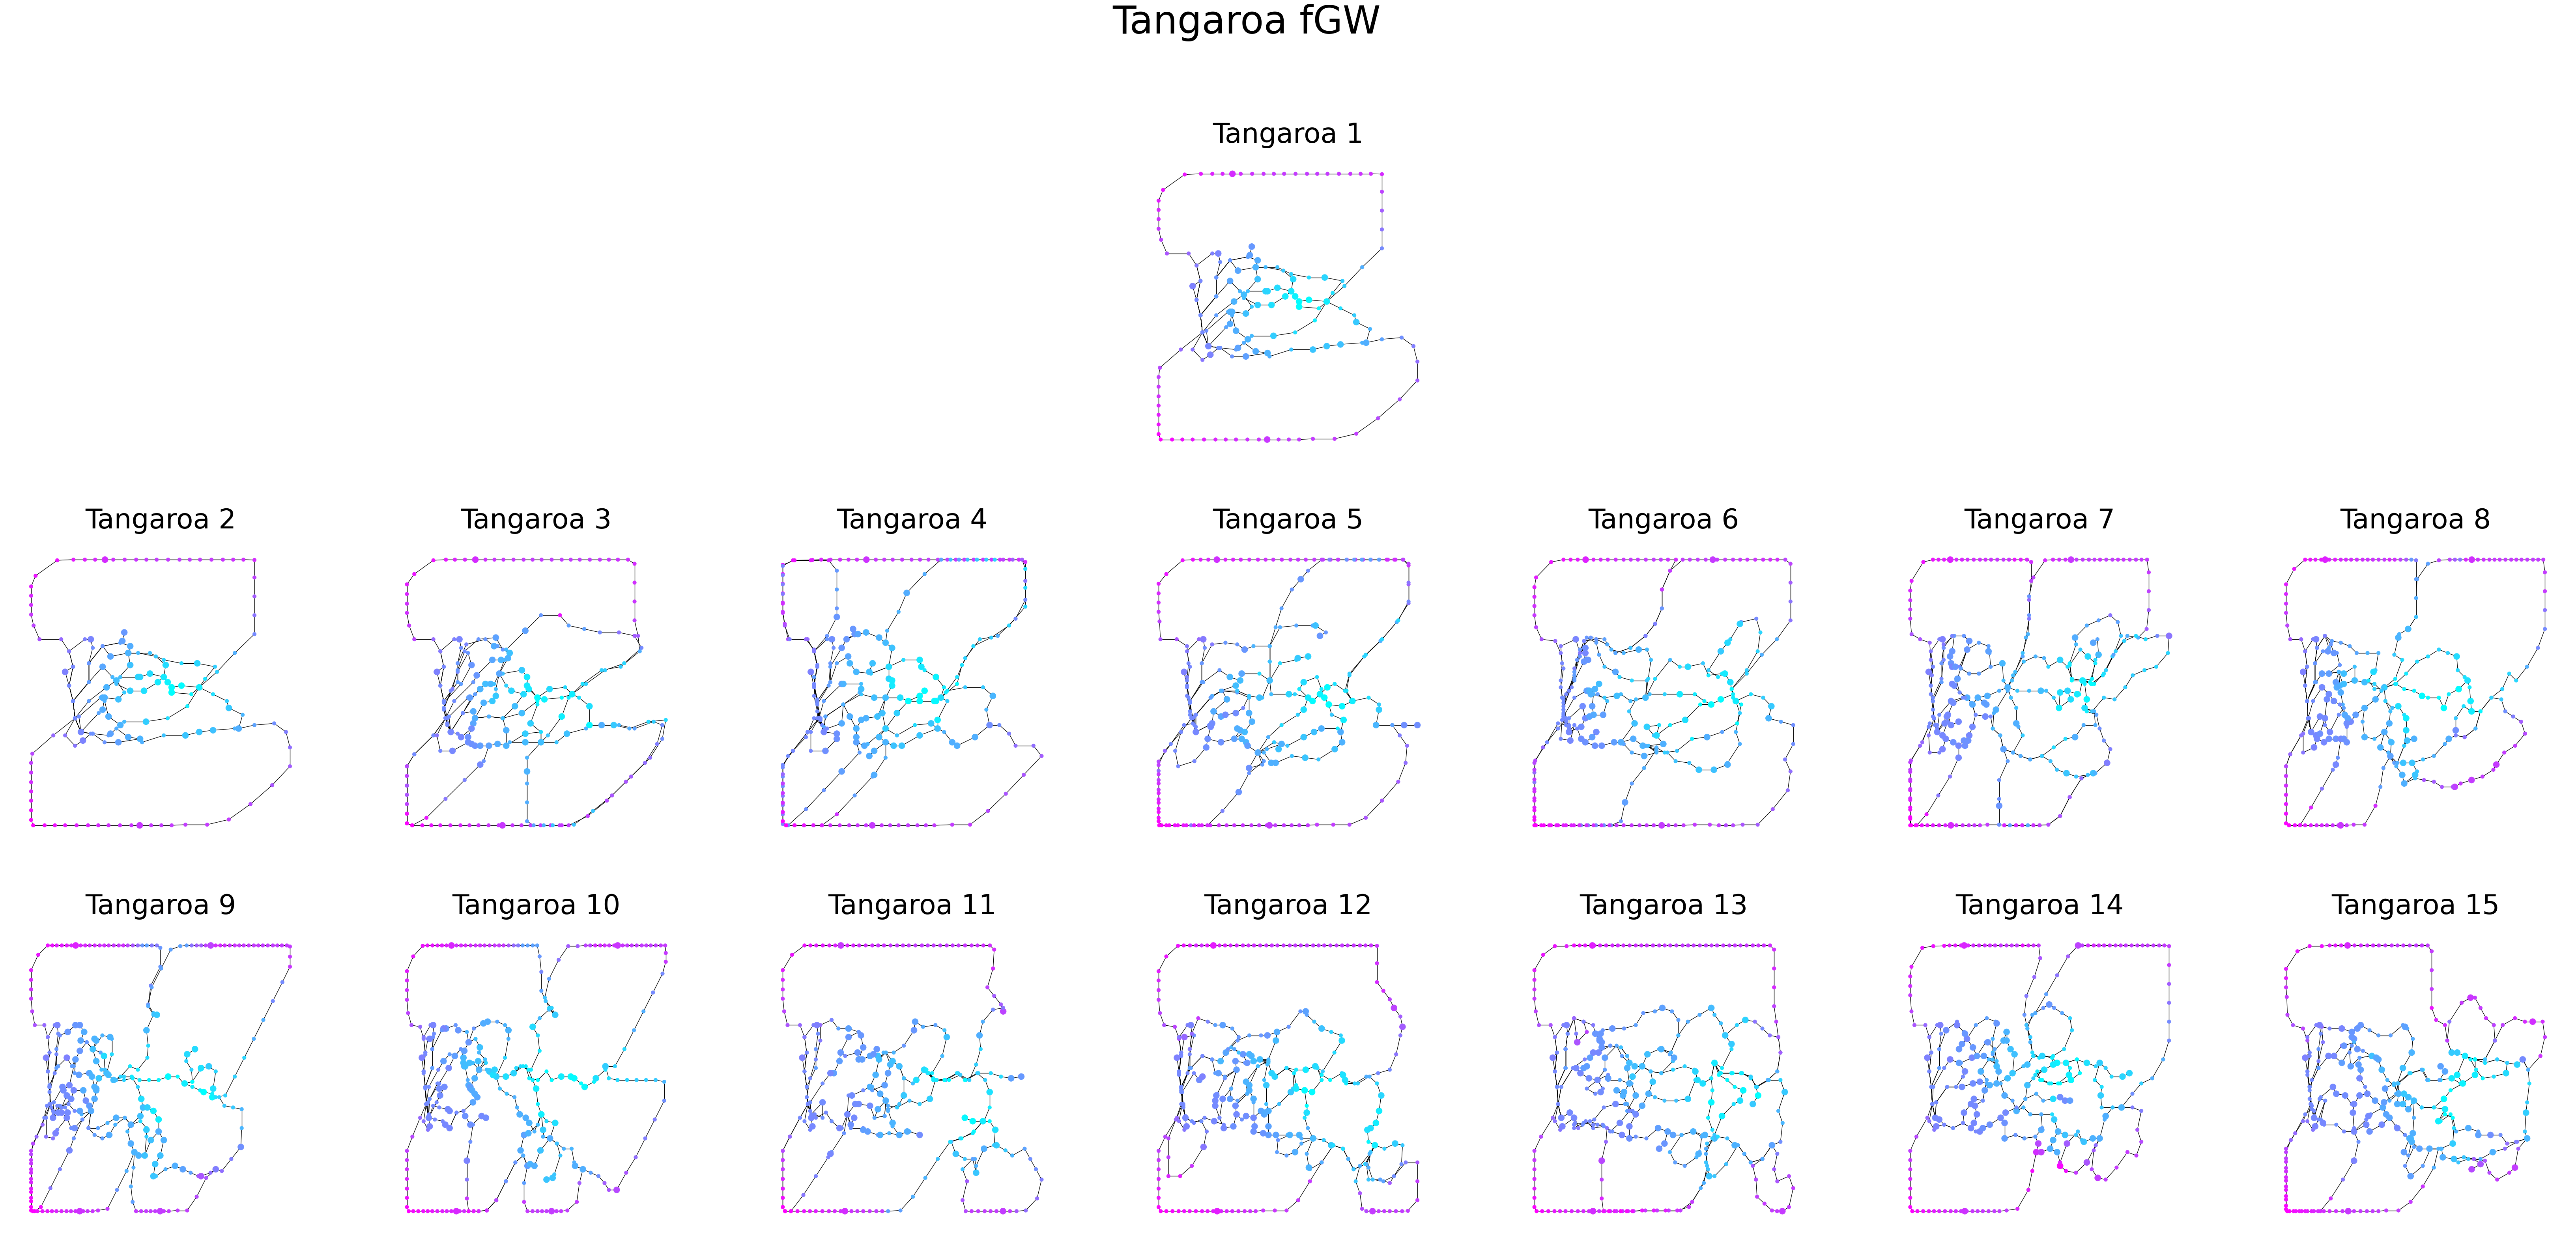

In [42]:
w, h = 7, 3

fig, axes = plt.subplots(h, w, figsize=(12 * w, 12 * h))

for ax in axes.ravel():
  ax.set_axis_off()

src_node_color = src.node_color_by_position()
src.draw(ax=axes[0, w//2], cmap=cmap, node_color=src_node_color)
axes[0, w//2].set_title('Tangaroa 1', fontsize=50)

for i, (dest, coupling, ax) in enumerate(zip(dests, couplings, axes.ravel()[w:])):
  dest.draw(ax=ax, cmap=cmap, node_color=dest.node_color_by_coupling(src_node_color, coupling))
  ax.set_title(f'Tangaroa {i + 2}', fontsize=50)
  
fig.suptitle('Tangaroa fGW', fontsize=70)

In [43]:
couplings = []

src_net = src.to_mpn(hist='degree', dist='geo')

for dest in dests:
  dest_net = dest.to_mpn(hist='degree', dist='geo')
    
  M = MorseGraph.attribute_cost_matrix(src, dest)  
  
  coupling, dist = ot.fpGW(src_net, dest_net, m, M)
    
  couplings.append(coupling)

Text(0.5, 0.98, 'Tangaroa fpGW')

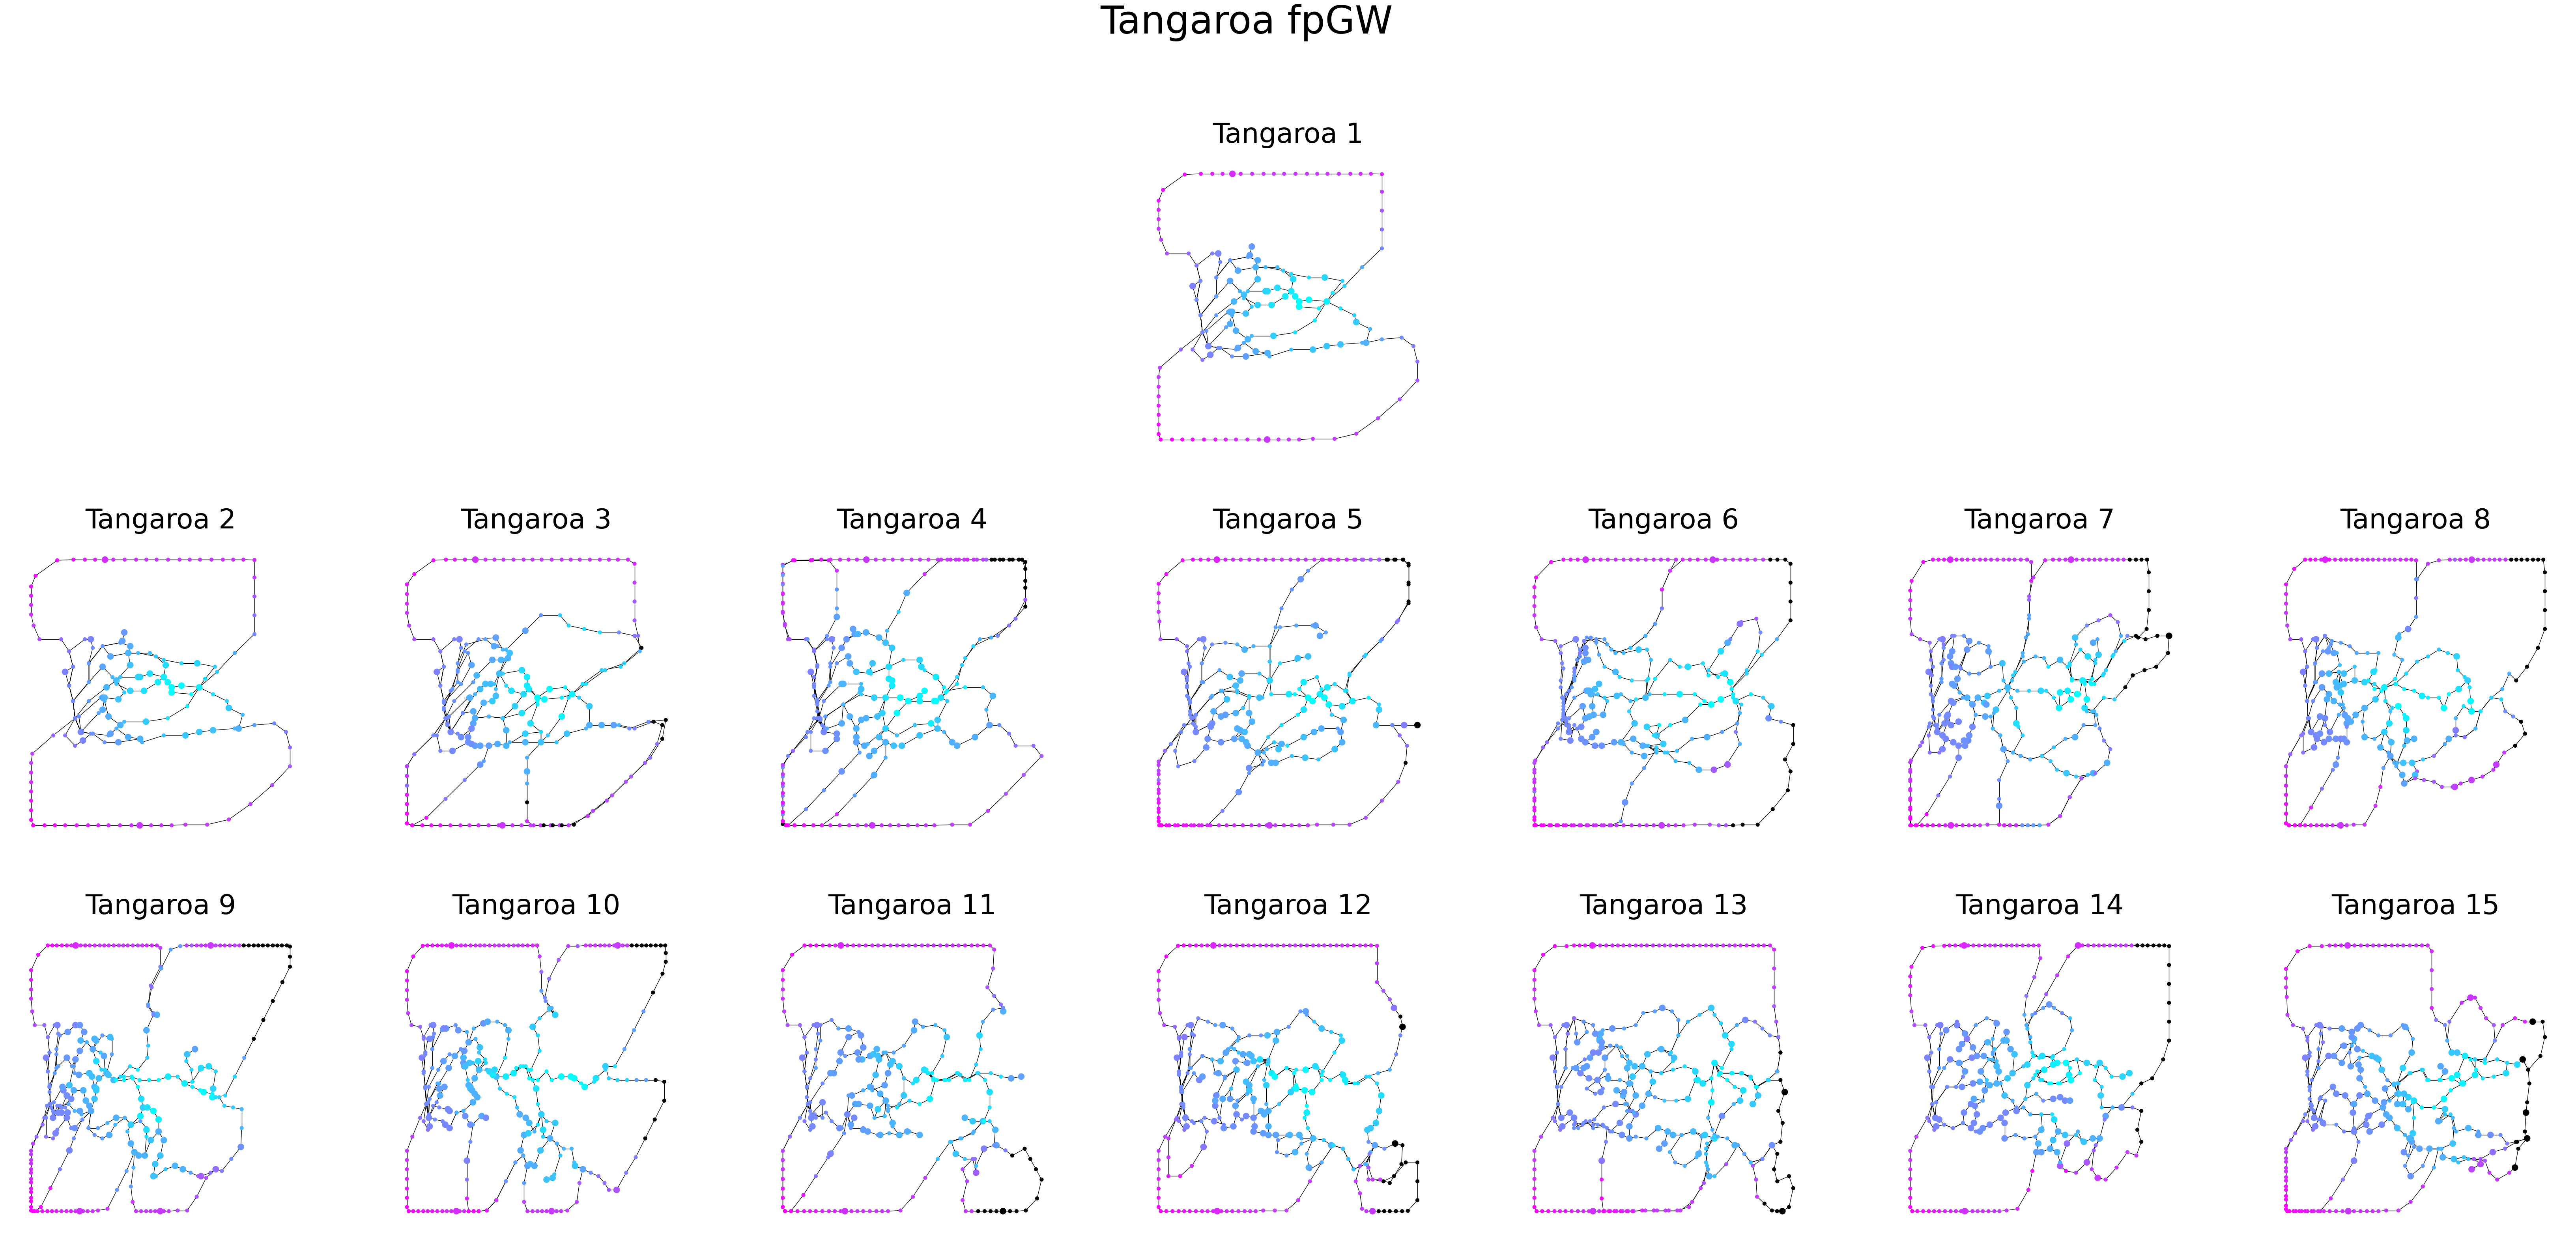

In [44]:
w, h = 7, 3

fig, axes = plt.subplots(h, w, figsize=(12 * w, 12 * h))

for ax in axes.ravel():
  ax.set_axis_off()

src_node_color = src.node_color_by_position()
src.draw(ax=axes[0, w//2], cmap=cmap, node_color=src_node_color)
axes[0, w//2].set_title('Tangaroa 1', fontsize=50)

for i, (dest, coupling, ax) in enumerate(zip(dests, couplings, axes.ravel()[w:])):
  dest.draw(ax=ax, cmap=cmap, node_color=dest.node_color_by_coupling(src_node_color, coupling))
  ax.set_title(f'Tangaroa {i + 2}', fontsize=50)
  
fig.suptitle('Tangaroa fpGW', fontsize=70)